# eda

In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [28]:
df=pd.read_csv('c:/users/gaurav yadav/downloads/crime_data.csv')

In [29]:
df.isna().sum()

#as there are no null values so no need of imputation

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [30]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values


# feature scaling

In [31]:
#normalizing the data
sc_x=StandardScaler()
x=sc_x.fit_transform(x)



# dendrogram

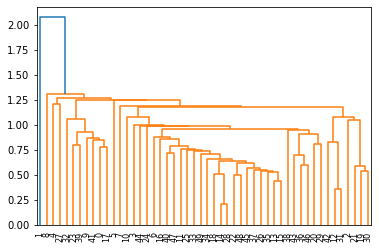

In [32]:
import scipy.cluster.hierarchy as sch
den=sch.dendrogram(sch.linkage(x,method='single'))

In [33]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [34]:
y_pr=hc.fit_predict(x)

In [35]:
df['Cluster']=hc.labels_

# Insights- cluster having states with  high crime rate i.e more murders,more assault,more rape .
# one reason for this is that  states in this group has more urban population and more the population more disparity in availability of things of basic need.
# and less employment opportunity.

# KMeans clustering

In [36]:
df=pd.read_csv('c:/users/gaurav yadav/downloads/crime_data.csv')
x=df.iloc[:,1:].values
y=df.iloc[:,0].values


# with in cluster sum of squares

In [37]:
#calculating wcss to select optimum number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# elbow chart

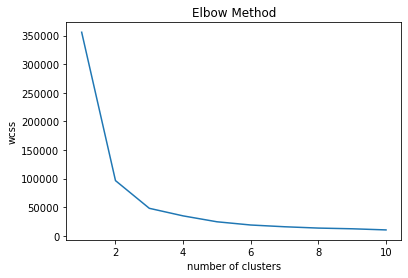

In [38]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [39]:
#from elbow chart it is clear we should go for  either 2 or 4 clusters.
kmeans=KMeans(n_clusters=4,random_state=1)
kmeans.fit(x)
df['cluster']=kmeans.labels_

In [40]:
df.groupby('cluster').agg('mean')

Murder     Assault   UrbanPop       Rape
cluster                                             
0         5.590000  112.400000  65.600000  17.270000
1        11.812500  272.562500  68.312500  28.375000
2         8.214286  173.285714  70.642857  22.842857
3         2.950000   62.700000  53.900000  11.510000

# conclusions
clusters  having states with minimum avg crime(murder,assault,rape) as well as minimum avg population.
cluster having states with maximum avg crime(murder,assault,rape) as well as maximum avg population.
reason for this type of result may be the population,more the population less will be the resources,or more will be the disparity bw individuals ,this may lead to high crime.

In [41]:
#crime1=df.to_csv('c:/users/gaurav yadav/downloads/crime1cluster.csv')

# DBSCAN 

In [42]:
df=pd.read_csv('c:/users/gaurav yadav/downloads/crime_data.csv')
x=df.iloc[:,1:].values
#FEATURE SCALING
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

In [43]:
#model building
model=DBSCAN(eps=1.1,min_samples=3)
model.fit(x)


DBSCAN(eps=1.1, min_samples=3)

In [44]:
df['cluster']=model.labels_

In [45]:
df1=df.groupby('cluster').agg('mean')

# eps value and min_samples-
'''as we reduce eps value number of outliers increases , and as we increases min_samples 
beyond 5 no. of outliers in data increases drastically,so optimum value of eps=1.1,and min_samples=3 we get the best result although these are not best combination ,bcz in one cluster we have 30 data points which is 60% of totol data points
in dataset but noise data points are in limit that is about 14% of total data points in dataset.


we should not use DBSCAN for this data set,we should use some other algo like KMeans or hierarchical clustering.'''

# Insights from clusters--'''the states which are treated as outliers are having maximum avg assault,avg urbanpop, avg rape and high avg murder may be that's why they are treated as outliers.                                                                    Cluster with minimum avg murder , avg assault and avg rape ,reason for that is bcz it contains maximum number of data points ,bcz of that variation is more.                                                                                                                          For remaining clusters there are less number of data points and variation with in a feature is very less .'''



# '''for cluster  with maximum data points cluster 2 variation of data with in a column. for murder column max =9.7 and min=.8                                                  for assault column  max=190,   min=45                                                                for rape column max=29.3 ,min=7.3'''


# we will use KMeans model as our final model for this data set,because it produces best results.